In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import seaborn as sns

In [2]:
df_train = pd.read_csv(r'train.csv')
df_test = pd.read_csv(r'test.csv')

/tmp/ipykernel_219475/782459714.py:1: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv(r'train.csv')


In [3]:
df_train.head()

,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,...,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,124000
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,123500
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,91500
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,130000
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,117000


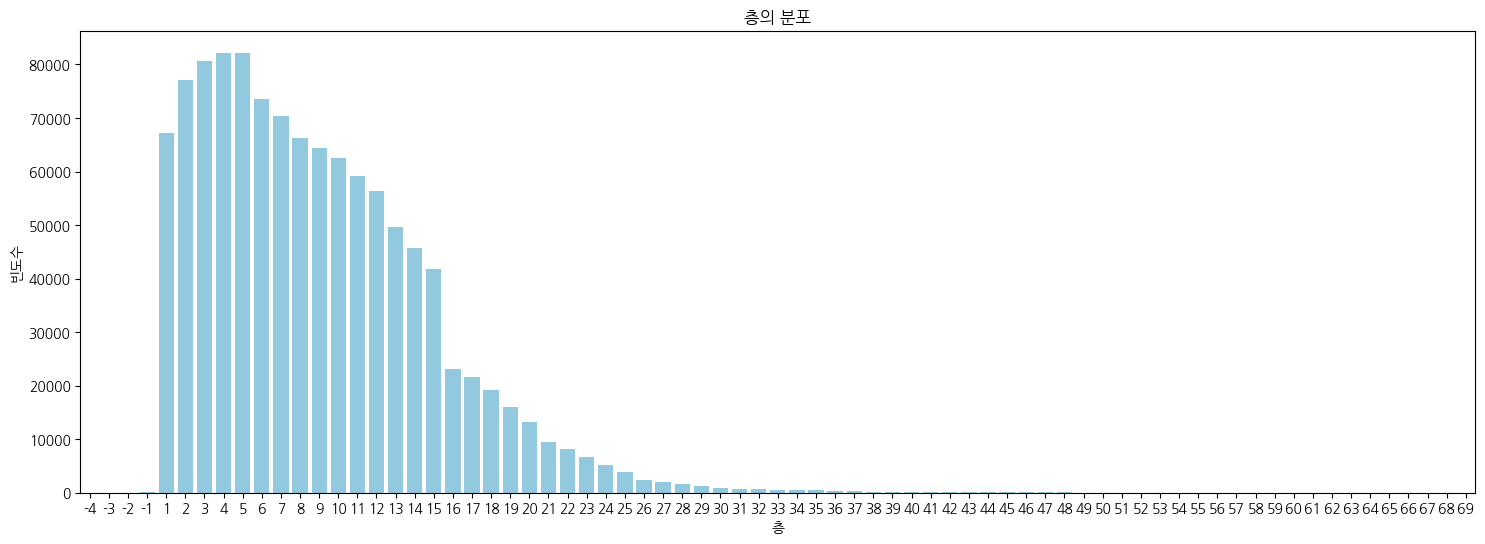

In [4]:
# 한글 폰트 설정
plt.rc('font', family='NanumGothic')

# '층' 분포 카운트플롯
plt.figure(figsize=(18, 6))
sns.countplot(data=df_train, x='층', color='skyblue')
plt.title('층의 분포')
plt.xlabel('층')
plt.ylabel('빈도수')
plt.show()

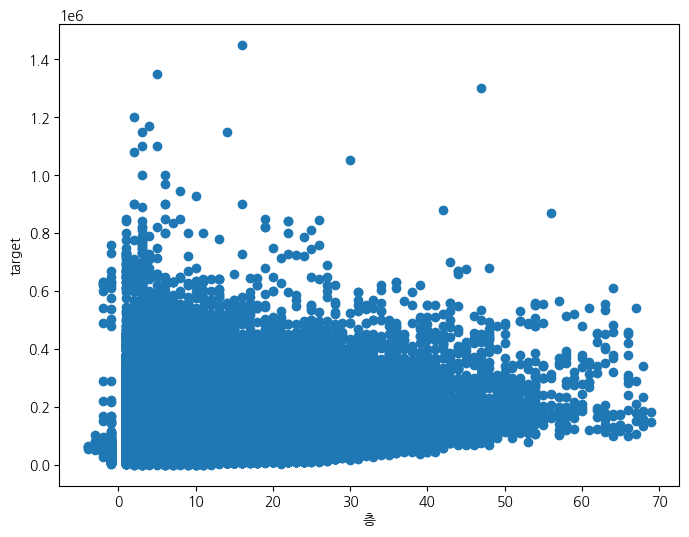

In [5]:
f,ax=plt.subplots(figsize=(8,6))
plt.scatter(df_train['층'],df_train['target'])
plt.xlabel('층')
plt.ylabel('target')
plt.show()

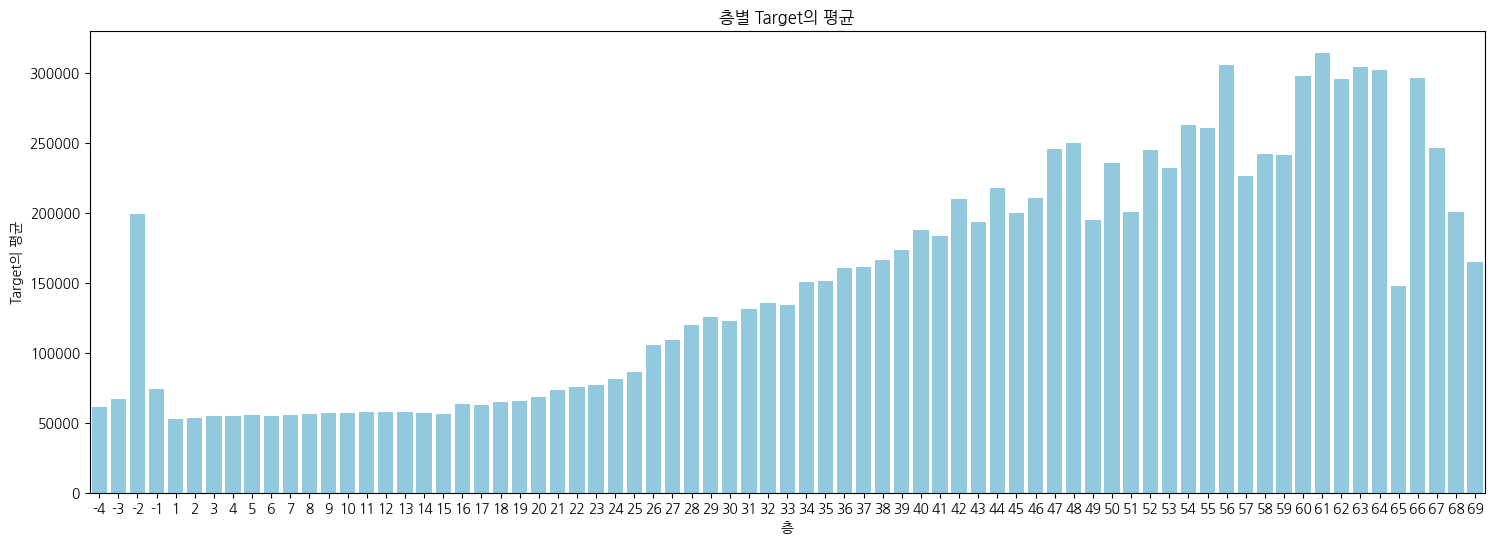

In [6]:
# 층별 target의 평균
mean_target = df_train.groupby('층')['target'].mean().reset_index()

# 막대그래프
plt.figure(figsize=(18, 6))
sns.barplot(data=mean_target, x='층', y='target', color='skyblue')
plt.title('층별 Target의 평균')
plt.xlabel('층')
plt.ylabel('Target의 평균')
plt.show()

In [7]:
# train/test 구분을 위한 칼럼을 하나로
df_train['is_test'] = 0
df_test['is_test'] = 1
concat = pd.concat([df_train, df_test])     # 하나의 데이터로 만들어줍니다.
concat['is_test'].value_counts()   

0    1118822
1       9272
Name: is_test, dtype: int64

In [8]:
# '층' 컬럼에 5를 더한 후 로그 변환 (-4층까지 있어서)
concat['floor_log'] = np.log(concat['층'] + 5)

# 결과 확인
print(concat.head())

             시군구     번지     본번   부번    아파트명  전용면적(㎡)    계약년월  계약일  층  건축년도  \
0  서울특별시 강남구 개포동  658-1  658.0  1.0  개포6차우성    79.97  201712    8  3  1987   
1  서울특별시 강남구 개포동  658-1  658.0  1.0  개포6차우성    79.97  201712   22  4  1987   
2  서울특별시 강남구 개포동  658-1  658.0  1.0  개포6차우성    54.98  201712   28  5  1987   
3  서울특별시 강남구 개포동  658-1  658.0  1.0  개포6차우성    79.97  201801    3  4  1987   
4  서울특별시 강남구 개포동  658-1  658.0  1.0  개포6차우성    79.97  201801    8  2  1987   

   ... 기타/의무/임대/임의=1/2/3/4                  단지승인일 사용허가여부 관리비 업로드        좌표X  \
0  ...                  임의  2022-11-17 13:00:29.0      Y       N  127.05721   
1  ...                  임의  2022-11-17 13:00:29.0      Y       N  127.05721   
2  ...                  임의  2022-11-17 13:00:29.0      Y       N  127.05721   
3  ...                  임의  2022-11-17 13:00:29.0      Y       N  127.05721   
4  ...                  임의  2022-11-17 13:00:29.0      Y       N  127.05721   

         좌표Y                  단지신청일    target  is_test f

In [9]:
# 이제 다시 train과 test dataset을 분할, 제작해 놓았던 is_test 칼럼을 이용
dt_train = concat.query('is_test==0')
dt_test = concat.query('is_test==1')

# 이제 is_test 칼럼은 drop
dt_train.drop(['is_test'], axis = 1, inplace=True)
dt_test.drop(['is_test'], axis = 1, inplace=True)
print(dt_train.shape, dt_test.shape)

(1118822, 53) (9272, 53)


/tmp/ipykernel_219475/1841878261.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_train.drop(['is_test'], axis = 1, inplace=True)
/tmp/ipykernel_219475/1841878261.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_test.drop(['is_test'], axis = 1, inplace=True)


In [10]:
# 전체 데이터를 각각 CSV 파일로 저장
dt_train.to_csv('train_floor.csv', index=False)
dt_test.to_csv('test_floor.csv', index=False)

# 결과 확인
print("Train data saved to 'train_data.csv'")
print("Test data saved to 'test_data.csv'")

Train data saved to 'train_data.csv'
Test data saved to 'test_data.csv'


In [11]:
train = pd.read_csv('train_floor.csv')
train.head(2)

/tmp/ipykernel_219475/2705649006.py:1: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train_floor.csv')


,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,...,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target,floor_log
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,124000.0,2.079442
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,123500.0,2.197225


In [12]:
test = pd.read_csv('test_floor.csv')
test.head(2)

,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,...,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target,floor_log
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.9700,202307,26,5,1987,...,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,NaN,2.302585
1,서울특별시 강남구 개포동,651-1,651.0,1.0,개포더샵트리에,108.2017,202308,15,10,2021,...,305.0,의무,2022-02-23 13:01:10.0,Y,N,127.056394,37.484892,2022-02-23 11:05:05.0,NaN,2.708050
